### Import libraries

In [159]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

### Import files

In [160]:
anime_data = pd.read_csv('../anime_cleaned.csv')

### Removing some blank data

In [161]:
anime_data['episodes'].replace('', np.nan, inplace=True)
anime_data.dropna(subset=['episodes'], inplace=True)
anime_data['episodes'] = anime_data['episodes'].astype('int64')

### Init

In [162]:
linreg = LinearRegression()
gbm = GradientBoostingRegressor()

In [163]:
boardcast_cat = ['Sundays',
                 'Mondays',
                 'Tuesdays',
                 'Wednesdays',
                 'Thursdays',
                 'Fridays',
                 'Saturdays',
                 'Not schedule',
                 'Unknown']

### Helper function

In [164]:
def start_pipeline(predictors, numeric_predictors, cat_predictors_nominal, cat_predictors_ordinal, response):
    # Extract Response and Predictors
    y = pd.DataFrame(anime_data[response])
    X = pd.DataFrame(anime_data[predictors])

    oe = OrdinalEncoder(categories=[boardcast_cat])
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    oe.fit_transform(X[cat_predictors_ordinal])
    ohe.fit_transform(X[cat_predictors_nominal])

    column_transformer = make_column_transformer(
        (RobustScaler(), numeric_predictors),
        (oe, cat_predictors_ordinal),
        (ohe, cat_predictors_nominal))
        
    column_transformer.fit_transform(X)
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Linear Regression using Train Data
    lm_pipeline = make_pipeline(column_transformer, linreg)
    gbm_pipeline = make_pipeline(column_transformer, gbm)
    gbm_pipeline.fit(X_train, y_train)
    lm_pipeline.fit(X_train, y_train)        
    
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()
    
    # Predict Response corresponding to Predictors
    y_train_pred = lm_pipeline.predict(X_train)
    y_test_pred =  lm_pipeline.predict(X_test)

    y_gbm_train_pred = gbm_pipeline.predict(X_train)
    y_gbm_test_pred = gbm_pipeline.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes[0][0].scatter(y_train, y_train_pred, color = "blue")
    axes[0][0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][0].set_xlabel("True values of the Response Variable (Train)")
    axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1][0].scatter(y_test, y_test_pred, color = "green")
    axes[1][0].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][0].set_xlabel("True values of the Response Variable (Test)")
    axes[1][0].set_ylabel("Predicted values of the Response Variable (Test)")

    axes[0][1].scatter(y_train, y_gbm_train_pred, color = "blue")
    axes[0][1].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][1].set_xlabel("GB True values of the Response Variable (Train)")
    axes[0][1].set_ylabel("GB Predicted values of the Response Variable (Train)")
    axes[1][1].scatter(y_test, y_gbm_test_pred, color = "green")
    axes[1][1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][1].set_xlabel("GB True values of the Response Variable (Test)")
    axes[1][1].set_ylabel("GB Predicted values of the Response Variable (Test)")
    plt.show()
    
    print("Linear Regression")
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print("Accuracy \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    print("Gradient Boosting")
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_gbm_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_gbm_test_pred))
    print()

    return (lm_pipeline, gbm_pipeline)

### Predicting `score`

/Users/suzanna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Intercept of Regression 	: b =  [7.30673279]
Coefficients of Regression 	: a =  [[-4.85127839e-01  1.16796489e-02  4.90182229e-02 -6.69614894e-04
  -1.04769021e-03  4.95971207e-02 -6.88508520e-02  2.01015143e-01
  -1.89937222e-01 -9.01118390e-02  9.17282714e-02 -4.13219886e-01
  -2.29002791e-01  2.48649333e-01  6.49103435e-02 -5.36048308e-02
   1.97099603e-01 -5.21363799e-01  1.02976817e-02 -2.69173117e-01
   3.20861380e-02  9.40928393e-01 -9.99043639e-02  1.21681650e-01
  -8.32537037e-02  2.65099006e-03  4.71823163e-02  1.16431109e-02
  -3.14063598e-02  3.55564053e-02  1.81704923e-02  1.30804864e-01
   1.12687865e-02  5.19669367e-02  1.67517579e-02  7.39056131e-02
   1.23443171e-01  1.03307333e-01 -1.22330459e-01 -2.21565494e-02
  -2.19387126e-01 -1.45603743e-01 -2.42911219e-02  1.29642764e-02
  -1.79421155e-02 -8.54353289e-02  1.68554481e-01 -7.81413128e-02
   1.03097246e-01 -1.45060531e-02  6.81807377e-02  3.65718333e-02
   6.30062348e-02 -2.56349999e-01  1.30101173e-01 -1.30101173e

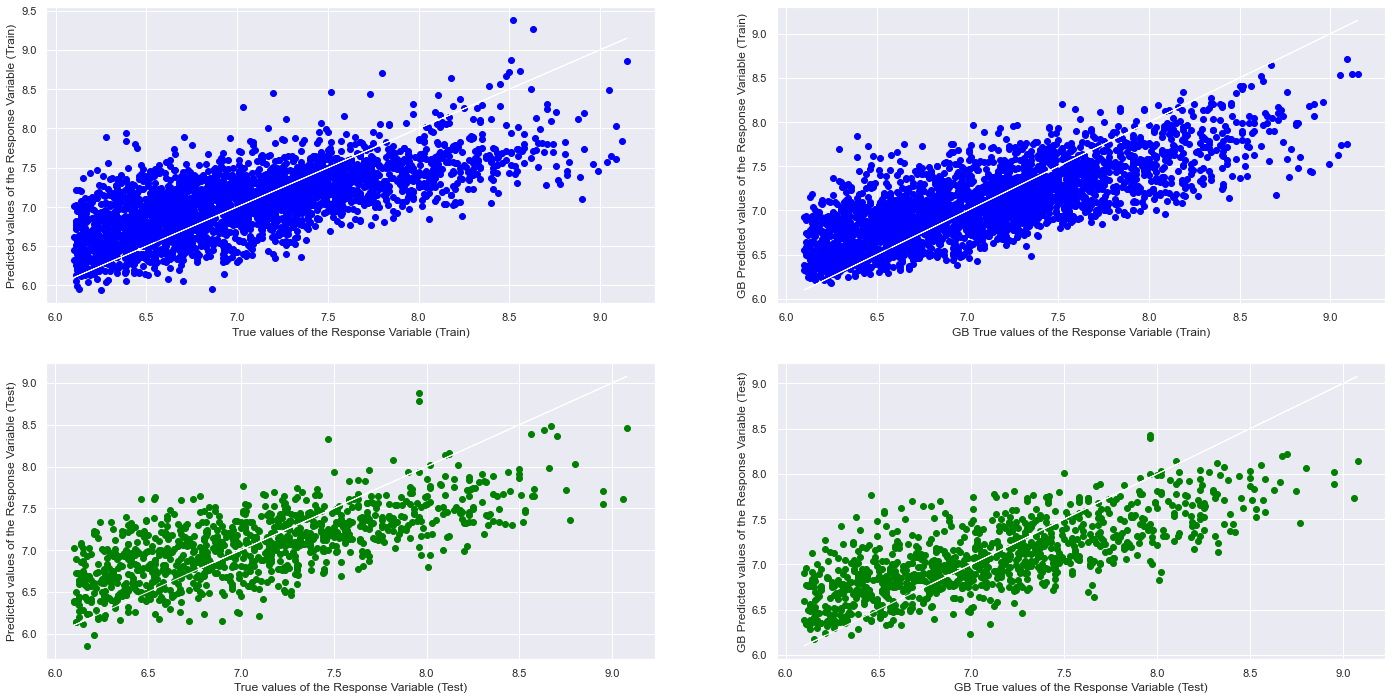

Linear Regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48114331211691486
Mean Squared Error (MSE) 	: 0.19642599318856635
Accuracy 	: 0.19642599318856635

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.47898208632271855
Mean Squared Error (MSE) 	: 0.20607728917938703

Gradient Boosting
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5775758160500388
Mean Squared Error (MSE) 	: 0.15991909098787155

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5341376195596
Mean Squared Error (MSE) 	: 0.18426171916860154



In [165]:
numeric_data = ['popularity', 'duration', 'scored_by_users']
cat_data = ['source', 'demographic', 'main genre',
            'premiered', 'rating', 'status', 'type', 'theme']

cat_ordinal_data = ['broadcast']
all_data = numeric_data+cat_data+cat_ordinal_data

(lm_pipeline, gbm_pipeline) = start_pipeline(all_data, numeric_data, cat_data, cat_ordinal_data, 'score')


#### Prediction

In [170]:
# Extract Pokemons for Prediction
anime_pred = anime_data[anime_data["title"].isin(anime_data["title"])]

In [171]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(anime_pred[all_data])

# Predict Response corresponding to Predictors
y_pred = lm_pipeline.predict(X_pred)
gb_y_pred = gbm_pipeline.predict(X_pred)

In [172]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["pred_score"], index = anime_pred.index)
animedata_acc = pd.concat([anime_pred[["title", "score"]], y_pred], axis = 1)

y_errs = 100 * abs(animedata_acc["score"] - animedata_acc["pred_score"]) / animedata_acc["score"]
y_errs = pd.DataFrame(y_errs, columns = ["error"], index = anime_pred.index)
animedata_acc= pd.concat([animedata_acc, y_errs], axis = 1)

animedata_acc

,title,score,pred_score,error
0,Fullmetal Alchemist: Brotherhood,9.15,8.857200,3.200002
1,Shingeki no Kyojin: The Final Season Part 2,9.12,7.843232,13.999654
2,Steins;Gate,9.09,8.025872,11.706580
3,Gintama°,9.09,7.610383,16.277410
4,Shingeki no Kyojin Season 3 Part 2,9.08,8.462530,6.800335
...,...,...,...,...
3953,Tantei Gakuen Q,7.74,7.166801,7.405670
3954,Tsuki ga Michibiku Isekai Douchuu,7.74,7.137267,7.787242
3955,Ueki no Housoku,7.74,7.286865,5.854454
3956,Uramichi Oniisan,7.74,7.207485,6.880037


In [173]:
# Summarize the Actuals, Predictions and Errors
gb_y_pred = pd.DataFrame(gb_y_pred, columns = ["pred_score"], index = anime_pred.index)
animedata_acc_gb = pd.concat([anime_pred[["title", "score"]], gb_y_pred], axis = 1)

gb_y_errs = 100 * abs(animedata_acc_gb["score"] - animedata_acc_gb["pred_score"]) / animedata_acc_gb["score"]
gb_y_errs = pd.DataFrame(gb_y_errs, columns = ["error"], index = anime_pred.index)
animedata_acc_gb= pd.concat([animedata_acc_gb, gb_y_errs], axis = 1)

animedata_acc_gb

,title,score,pred_score,error
0,Fullmetal Alchemist: Brotherhood,9.15,8.546604,6.594487
1,Shingeki no Kyojin: The Final Season Part 2,9.12,8.540231,6.357116
2,Steins;Gate,9.09,8.715688,4.117848
3,Gintama°,9.09,7.753645,14.701371
4,Shingeki no Kyojin Season 3 Part 2,9.08,8.140500,10.346913
...,...,...,...,...
3953,Tantei Gakuen Q,7.74,7.280145,5.941277
3954,Tsuki ga Michibiku Isekai Douchuu,7.74,7.114668,8.079228
3955,Ueki no Housoku,7.74,7.324970,5.362149
3956,Uramichi Oniisan,7.74,7.153078,7.582971


### Errors

In [176]:
print("Avg error (Linear Regression): \t", animedata_acc['error'].sum()/3942)
print("Avg error (Gradient Boosting): \t", animedata_acc_gb['error'].sum()/3942)

Avg error (Linear Regression): 	 4.953562079594272
Avg error (Gradient Boosting): 	 4.534733777103966
